# Import

In [1]:
import numpy as np
import random
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt
import re

import warnings
warnings.filterwarnings('ignore')

plt.rc('font', family='Malgun Gothic')

# seed 고정

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

# 데이터 로드

In [3]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

# EDA

## 기본적인 데이터 모양 살펴보기

In [4]:
train_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


object형: ID, 대출기간, 근로기간, 주택소유상태, 대출목적, 대출등급

## 결측치 보기

In [6]:
train_df.isna().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

=> 결측치 없음

## 숫자형 피처 describe 살펴보기

In [7]:
train_df.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000


## unique한 값 확인하기

In [9]:
## object형 unique한 값 확인
# 대출기간, 근로기간, 주택소유상태, 대출목적, 대출등급
print('대출기간: ', train_df['대출기간'].unique())
print()
print('근로기간: ', train_df['근로기간'].unique())
print()
print('주택소유상태: ', train_df['주택소유상태'].unique())
print()
print('대출목적: ', train_df['대출목적'].unique())
print()
print('대출등급: ', train_df['대출등급'].unique())

대출기간:  [' 36 months' ' 60 months']

근로기간:  ['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']

주택소유상태:  ['RENT' 'MORTGAGE' 'OWN' 'ANY']

대출목적:  ['부채 통합' '주택 개선' '주요 구매' '휴가' '의료' '자동차' '신용 카드' '소규모 사업' '기타' '이사' '주택'
 '재생 에너지']

대출등급:  ['C' 'B' 'A' 'D' 'F' 'G' 'E']


'근로기간', '대출목적' 범주가 엄청 많음 => 전처리 때 이에 관해서 처리하기.

In [30]:
## 수치형 unique한 값 확인
# 총계좌수, 최근_2년간_연체_횟수, 연체계좌수
print('총계좌수: ', train_df['총계좌수'].unique())
print()
print('최근_2년간_연체_횟수: ', train_df['최근_2년간_연체_횟수'].unique())
print()
print('연체계좌수: ', train_df['연체계좌수'].unique())

총계좌수:  [ 15  21  14  19  30  22  45  11  26  10  24  17  35  20   9  36  16  59
  29  12  28  31   8  37   6   7  13  25  46  18  42  32  63  38  43  23
  39  33  27  76   5  40  41  50  55  61  51  53  52  62  81  34  47  48
  44   4  64  56  54  67  49  72  69  57  66  73  65 101  58  85  86  97
  60  71  70  78  75  68  79  77  95  84  74  80  90  93  96  89  91  94
  82  87 109 130 102 105  92  99 127 106  98  83 169 140 151  88 125 112
 110]

최근_2년간_연체_횟수:  [ 0  1  9 11  6  2  3  4  5 14  8  7 16 10 13 12 18 17 30 15]

연체계좌수:  [0. 1. 2. 4.]


## target 피처의 value_counts 살펴보기

In [7]:
## target value_count
train_df['대출등급'].value_counts()

B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: 대출등급, dtype: int64

## 데이터형 종류

***
수치형: 
- 연속형: 대출금액, 연간소득, 부채_대비_소득_비율, 총상환원금, 총상환이자, 총연체금액
- 이산형: 총계좌수, 최근_2년간_연체_횟수, 연체계좌수

범주형: 
- 대출기간, 근로기간, 주택소유상태, 대출목적, 대출등급
***

## 시각화

<<추가 참고>>

https://dacon.io/competitions/official/236214/codeshare/9573?page=1&dtype=recent

https://dacon.io/competitions/official/236214/codeshare/9571?page=1&dtype=recent

### 수치형 데이터

'대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'

#### 이산형

총계좌수, 최근_2년간_연체_횟수, 연체계좌수

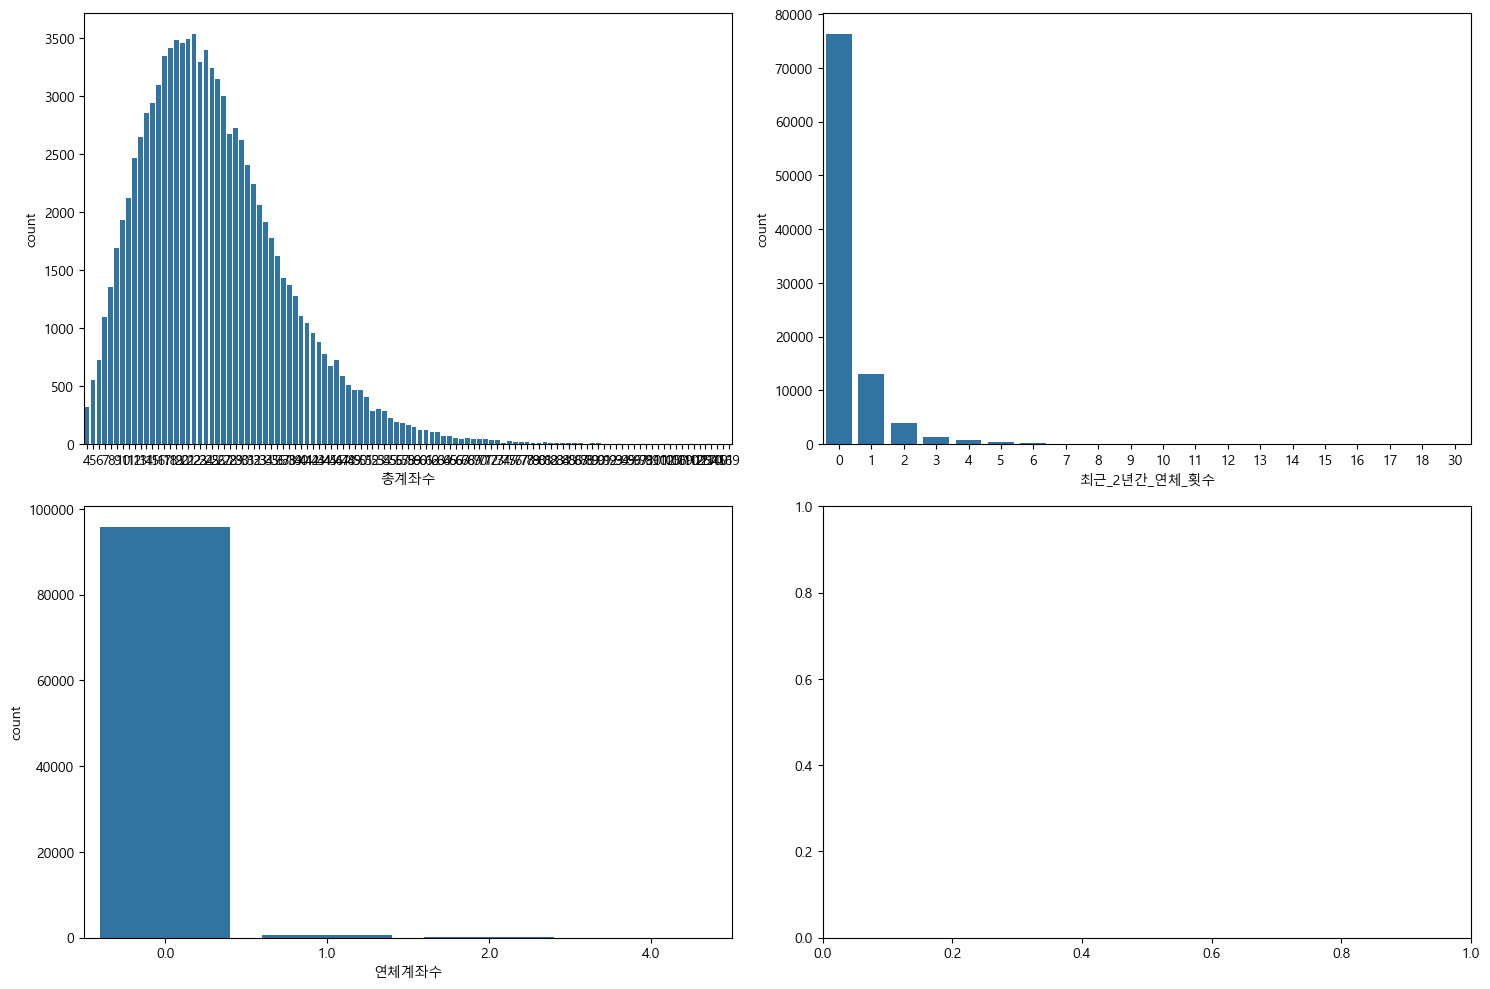

In [44]:
# count plot

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
sns.countplot(x='총계좌수', data=train_df, ax=axes[0][0])

sns.countplot(x='최근_2년간_연체_횟수', data=train_df, ax=axes[0][1])

sns.countplot(x='연체계좌수', data=train_df, ax=axes[1][0])

plt.tight_layout()
plt.show()

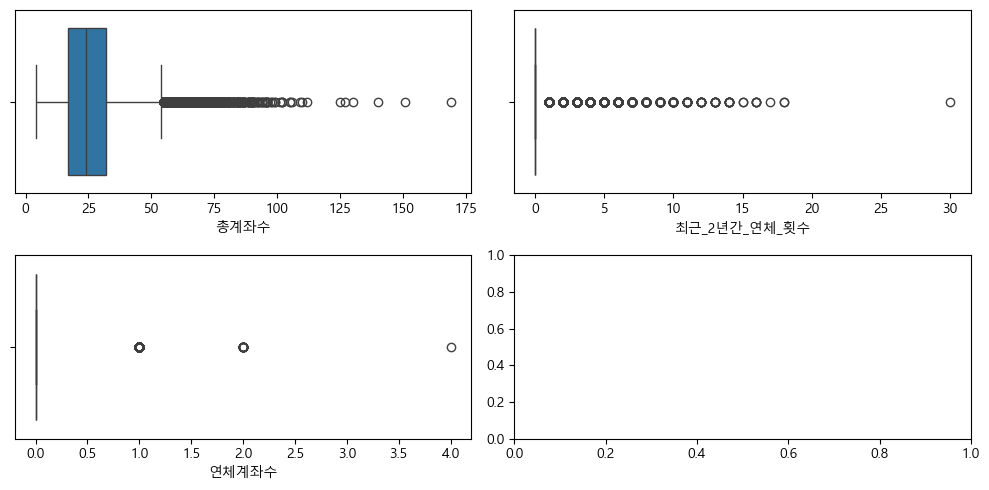

In [45]:
# box plot

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

sns.boxplot(x='총계좌수', data=train_df, ax=axes[0][0])

sns.boxplot(x='최근_2년간_연체_횟수', data=train_df, ax=axes[0][1])

sns.boxplot(x='연체계좌수', data=train_df, ax=axes[1][0])

plt.tight_layout()
plt.show()

#### 연속형

대출금액, 연간소득, 부채_대비_소득_비율, 총상환원금, 총상환이자, 총연체금액

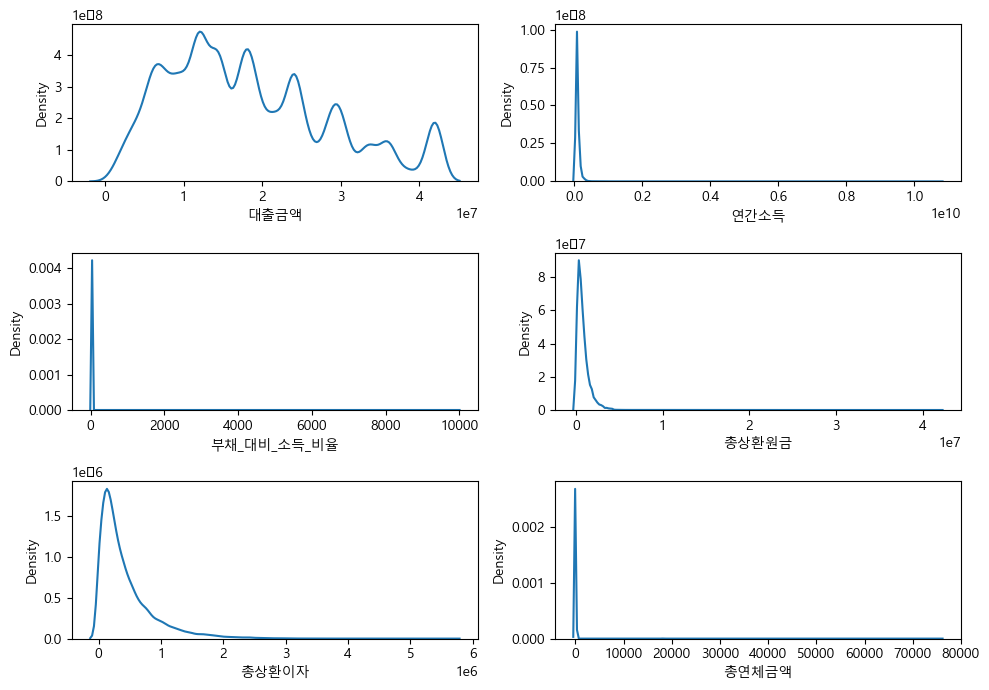

In [51]:
# dense plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 7))

sns.kdeplot(train_df['대출금액'], ax=axes[0][0])

sns.kdeplot(train_df['연간소득'], ax=axes[0][1])

sns.kdeplot(train_df['부채_대비_소득_비율'], ax=axes[1][0])

sns.kdeplot(train_df['총상환원금'], ax=axes[1][1])

sns.kdeplot(train_df['총상환이자'], ax=axes[2][0])

sns.kdeplot(train_df['총연체금액'], ax=axes[2][1])

plt.tight_layout()
plt.show()

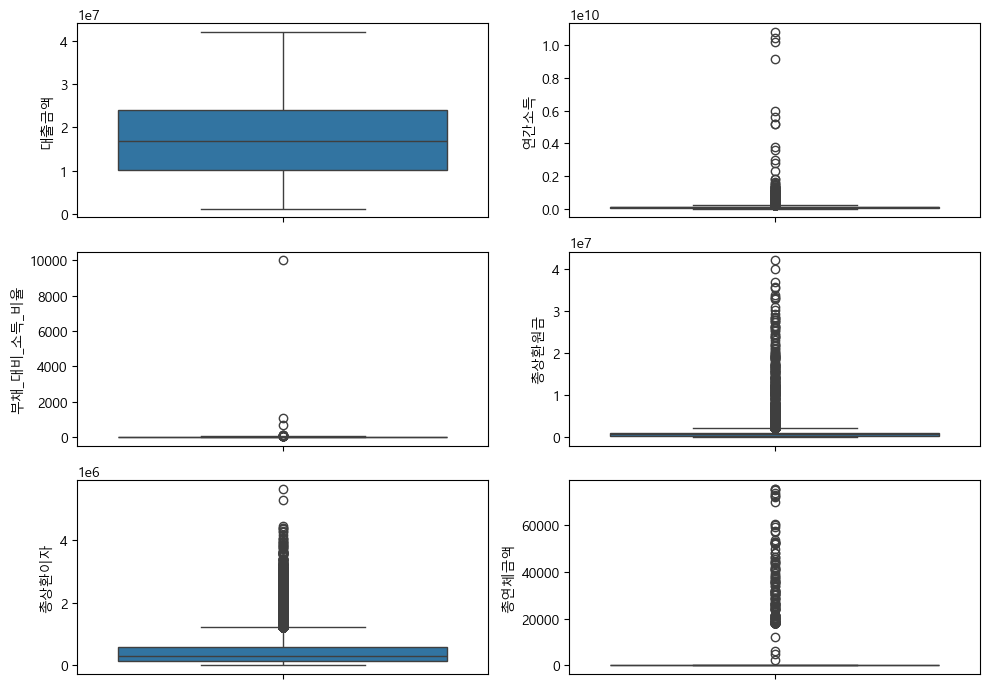

In [52]:
# box plot

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 7))

sns.boxplot(train_df['대출금액'], ax=axes[0][0])

sns.boxplot(train_df['연간소득'], ax=axes[0][1])

sns.boxplot(train_df['부채_대비_소득_비율'], ax=axes[1][0])

sns.boxplot(train_df['총상환원금'], ax=axes[1][1])

sns.boxplot(train_df['총상환이자'], ax=axes[2][0])

sns.boxplot(train_df['총연체금액'], ax=axes[2][1])

plt.tight_layout()
plt.show()

**=> 전체적으로 skewness가 큰 데이터임을 확인**

### 범주형

대출기간, 근로기간, 주택소유상태, 대출목적, 대출등급

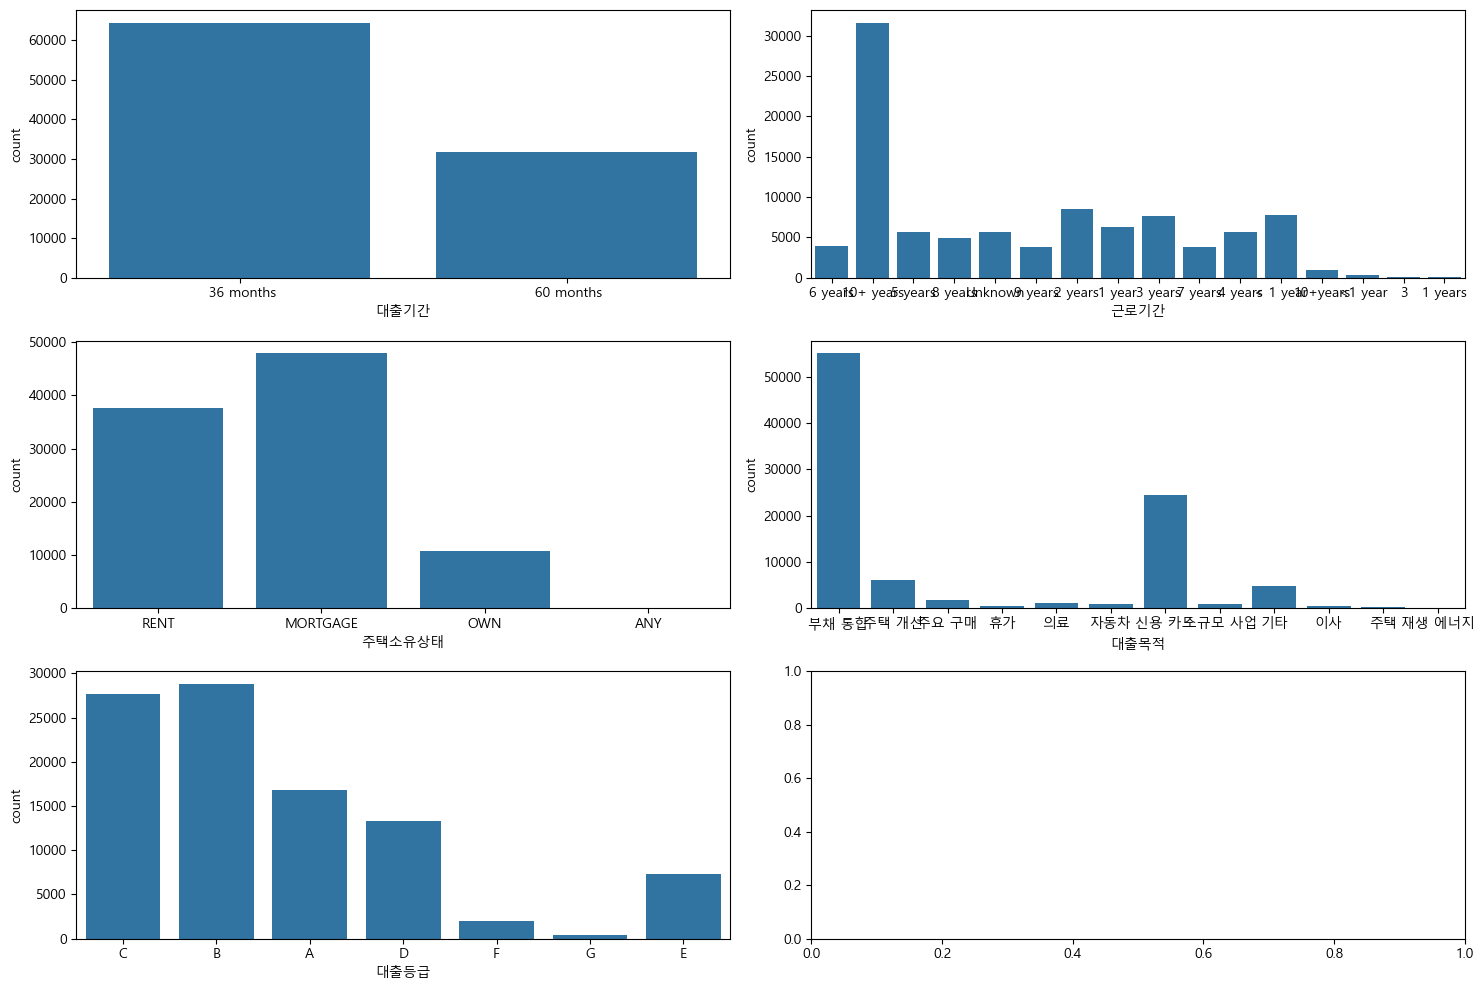

In [53]:
# count plot

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
sns.countplot(x='대출기간', data=train_df, ax=axes[0][0])

sns.countplot(x='근로기간', data=train_df, ax=axes[0][1])

sns.countplot(x='주택소유상태', data=train_df, ax=axes[1][0])

sns.countplot(x='대출목적', data=train_df, ax=axes[1][1])

sns.countplot(x='대출등급', data=train_df, ax=axes[2][0])

plt.tight_layout()
plt.show()

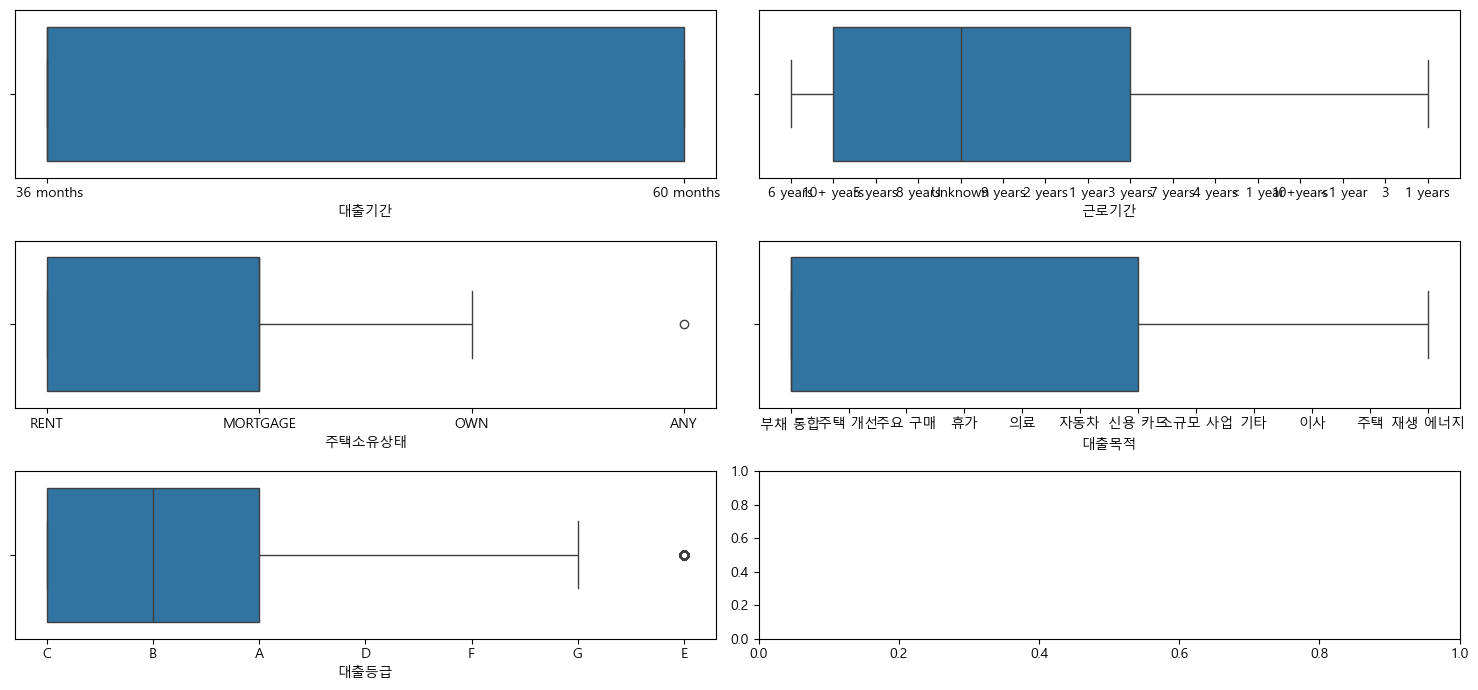

In [56]:
# box plot

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 7))
sns.boxplot(x='대출기간', data=train_df, ax=axes[0][0])

sns.boxplot(x='근로기간', data=train_df, ax=axes[0][1])

sns.boxplot(x='주택소유상태', data=train_df, ax=axes[1][0])

sns.boxplot(x='대출목적', data=train_df, ax=axes[1][1])

sns.boxplot(x='대출등급', data=train_df, ax=axes[2][0])

plt.tight_layout()
plt.show()

## 추가 아이디어

### '부채_대비_소득_비율' 이상치인지 아닌지?

In [67]:
# '부채_대비_소득_비율' 75% 사분위수 이상 데이터 개수

percentile_75 = np.percentile(train_df['부채_대비_소득_비율'], 75)

top_75_values_unique = train_df['부채_대비_소득_비율'][train_df['부채_대비_소득_비율'] > percentile_75].unique()
top_75_values = train_df['부채_대비_소득_비율'][train_df['부채_대비_소득_비율'] > percentile_75]

print('Number of "unique" values in the top 75%: ', len(top_75_values_unique))
print('Number of  values in the top 75%: ', len(top_75_values))

Number of "unique" values in the top 75%:  1488
Number of  values in the top 75%:  24067


In [68]:
# '부채_대비_소득_비율' 90% 사분위수 이상 데이터 개수

percentile_75 = np.percentile(train_df['부채_대비_소득_비율'], 90)

top_75_values_unique = train_df['부채_대비_소득_비율'][train_df['부채_대비_소득_비율'] > percentile_75].unique()
top_75_values = train_df['부채_대비_소득_비율'][train_df['부채_대비_소득_비율'] > percentile_75]

print('Number of "unique" values in the top 75%: ', len(top_75_values_unique))
print('Number of  values in the top 75%: ', len(top_75_values))

Number of "unique" values in the top 75%:  890
Number of  values in the top 75%:  9627


### value_conts()

In [70]:
train_df['주택소유상태'].value_counts()

MORTGAGE    47934
RENT        37705
OWN         10654
ANY             1
Name: 주택소유상태, dtype: int64

=> ANY는 결측치로 간주하고 제일 많은 MORTAGE로 대체하기로 결정

In [71]:
train_df['대출목적'].value_counts()

부채 통합     55150
신용 카드     24500
주택 개선      6160
기타         4725
주요 구매      1803
의료         1039
자동차         797
소규모 사업      787
이사          506
휴가          466
주택          301
재생 에너지       60
Name: 대출목적, dtype: int64

=> 부채 통합, 신용 카드, 주택, 기타의 4개의 범주로 통합하기로 결정

In [72]:
train_df['근로기간'].value_counts() 

10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: 근로기간, dtype: int64

=> 0~10의 11개 숫자형 범주로 바꿔주기로 결정